#                                         Purpose of project:

■ Cluster datasets using multiple techniques such as Kmeans and euclidean distance measures.

■ Measure distances between locations on a spherical globe.

■ Visualize locations on a map.

■ Extract location coordinates from headline text. 

### 1. Loading our textfile that has scraped headlines from the web and converting it to a pandas dataframe via NLP

In [1]:
!pip install geonamescache
from geonamescache import GeonamesCache
gc = GeonamesCache()

In [2]:
file = open('headlines.txt','r')
headlines = [line.strip()
            for line in file.readlines()]
num= len(headlines)
print(f"We have {num} headlines loaded from our textfile")

We have 650 headlines loaded from our textfile


In [3]:
headlines

['Zika Outbreak Hits Miami',
 'Could Zika Reach New York City?',
 'First Case of Zika in Miami Beach',
 'Mystery Virus Spreads in Recife, Brazil',
 'Dallas man comes down with case of Zika',
 'Trinidad confirms first Zika case',
 'Zika Concerns are Spreading in Houston',
 'Geneve Scientists Battle to Find Cure',
 'The CDC in Atlanta is Growing Worried',
 'Zika Infested Monkeys in Sao Paulo',
 'Brownsville teen contracts Zika virus',
 'Mosquito control efforts in St. Louis take new tactics with Zika threat',
 'San Juan reports 1st U.S. Zika-related death amid outbreak',
 'Flu outbreak in Galveston, Texas',
 'Zika alert â€“ Manila now threatened',
 'Zika afflicts 7 in Iloilo City',
 'New Los Angeles Hairstyle goes Viral',
 'Louisiana Zika cases up to 26',
 'Orlando volunteers aid Zika research',
 'Zika infects pregnant woman in Cebu',
 "Chicago's First Zika Case Confirmed",
 'Tampa Bay Area Zika Case Count Climbs',
 'Bad Water Leads to Sickness in Flint, Michigan',
 'Baltimore plans for 

In [4]:
def name_to_regex(name):
    decoded_name = unidecode(name)
    if name != decoded_name:
        regex = fr'\b({name}|{decoded_name})\b'
    else:
        regex = fr'\b{name}\b'
    return re.compile(regex, flags=re.IGNORECASE)

In [5]:
import re
from unidecode import unidecode
countries = [country['name'] 
             for country in gc.get_countries().values()]
country_to_name = {name_to_regex(name): name 
                   for name in countries}
                   
cities = [city['name'] for city in gc.get_cities().values()]
city_to_name = {name_to_regex(name): name for name in cities}

In [6]:
country_to_name

{re.compile(r'\bAndorra\b', re.IGNORECASE|re.UNICODE): 'Andorra',
 re.compile(r'\bUnited Arab Emirates\b',
            re.IGNORECASE|re.UNICODE): 'United Arab Emirates',
 re.compile(r'\bAfghanistan\b', re.IGNORECASE|re.UNICODE): 'Afghanistan',
 re.compile(r'\bAntigua and Barbuda\b',
            re.IGNORECASE|re.UNICODE): 'Antigua and Barbuda',
 re.compile(r'\bAnguilla\b', re.IGNORECASE|re.UNICODE): 'Anguilla',
 re.compile(r'\bAlbania\b', re.IGNORECASE|re.UNICODE): 'Albania',
 re.compile(r'\bArmenia\b', re.IGNORECASE|re.UNICODE): 'Armenia',
 re.compile(r'\bAngola\b', re.IGNORECASE|re.UNICODE): 'Angola',
 re.compile(r'\bAntarctica\b', re.IGNORECASE|re.UNICODE): 'Antarctica',
 re.compile(r'\bArgentina\b', re.IGNORECASE|re.UNICODE): 'Argentina',
 re.compile(r'\bAmerican Samoa\b', re.IGNORECASE|re.UNICODE): 'American Samoa',
 re.compile(r'\bAustria\b', re.IGNORECASE|re.UNICODE): 'Austria',
 re.compile(r'\bAustralia\b', re.IGNORECASE|re.UNICODE): 'Australia',
 re.compile(r'\bAruba\b', re.IGN

In [7]:
def get_name_in_text(text, dictionary):
    '''Will take our text file and match with our dictionary'''
    for regex, name in sorted(dictionary.items(), 
                              key=lambda x: x[1]):
        if regex.search(text):
            return name
    return None

In [8]:
import pandas as pd

matched_countries = [get_name_in_text(headline, country_to_name)
                     for headline in headlines]
matched_cities = [get_name_in_text(headline, city_to_name)
                  for headline in headlines]
data = {'Headline': headlines, 'City': matched_cities, 
        'Country': matched_countries}
df = pd.DataFrame(data)

In [9]:
df.shape

(650, 3)

In [10]:
summary = df[['City', 'Country']].describe()
print(summary)

       City Country
count   618      15
unique  511      10
top      Of  Brazil
freq     44       3


In [11]:
#top city is 'Of' this is not a real city of course and an error in our matching
count_of_of = (df['City'] == 'Of').sum()
print(count_of_of)


44


In [12]:
of_cities = df[df.City == 'Of'][['Headline']]
ten_of_cities = of_cities.head(44)
print(ten_of_cities.to_string(index=False))

                                                               Headline
                                  Case of Measles Reported in Vancouver
Authorities are Worried about the Spread of Bronchitis in Silver Spring
    Authorities are Worried about the Spread of Mad Cow Disease in Rome
                   Rochester authorities confirmed the spread of Dengue
                         Tokyo Encounters Severe Symptoms of Meningitis
      Authorities are Worried about the Spread of Influenza in Savannah
                                Spike of Pneumonia Cases in Springfield
                    The Spread of Measles in Spokane has been Confirmed
                                        Outbreak of Zika in Panama City
                        Urbana Encounters Severe Symptoms of Meningitis
                                       Outbreak of Zika in Stephenville
                        Providence Encounters Severe Symptoms of Dengue
         Authorities are Worried about the Spread of Rotavirus i

In [13]:
# Extract the correct city from the headline and update the 'City' column
df['City'] = df.apply(lambda row: row['Headline'].split()[-1] if row['City'] == 'Of' else row['City'], axis=1)

# Print the updated DataFrame
print(df)


                                              Headline           City Country
0                             Zika Outbreak Hits Miami          Miami    None
1                      Could Zika Reach New York City?  New York City    None
2                    First Case of Zika in Miami Beach          Miami    None
3              Mystery Virus Spreads in Recife, Brazil         Recife  Brazil
4              Dallas man comes down with case of Zika         Dallas    None
..                                                 ...            ...     ...
645  Rumors about Rabies spreading in Jerusalem hav...      Jerusalem    None
646              More Zika patients reported in Indang         Indang    None
647  Suva authorities confirmed the spread of Rotav...      Rotavirus    None
648         More Zika patients reported in Bella Vista    Bella Vista    None
649                     Zika Outbreak in Wichita Falls        Wichita    None

[650 rows x 3 columns]


In [14]:
count_of_of = (df['City'] == 'Of').sum()
print(count_of_of)

0


In [15]:
summary = df[['City', 'Country']].describe()
print(summary)

       City Country
count   618      15
unique  542      10
top     San  Brazil
freq     11       3


In [16]:
df.Country.isnull().sum()
#Here we can see our country matching did not work too well

635

In [17]:
#This datahub has all world cities and their associated country. We can use it to fillin our missing country data

citytocountry = pd.read_csv('https://datahub.io/core/world-cities/r/world-cities.csv')

citytocountry.rename(columns ={"name":"City"}, inplace=True)

citytocountry

,City,country,subcountry,geonameid
0,les Escaldes,Andorra,Escaldes-Engordany,3040051
1,Andorra la Vella,Andorra,Andorra la Vella,3041563
2,Umm al Qaywayn,United Arab Emirates,Umm al Qaywayn,290594
3,Ras al-Khaimah,United Arab Emirates,Raʼs al Khaymah,291074
4,Khawr Fakkān,United Arab Emirates,Ash Shāriqah,291696
...,...,...,...,...
23013,Bulawayo,Zimbabwe,Bulawayo,894701
23014,Bindura,Zimbabwe,Mashonaland Central,895061
23015,Beitbridge,Zimbabwe,Matabeleland South,895269
23016,Epworth,Zimbabwe,Harare,1085510


In [18]:
# Convert the 'City' values into a list to compare with our new dictionary of countries
column_list = df['City'].tolist()

In [19]:
# create a list of city names for testing
myCityList = column_list

# pull out all the rows matching a city in the test list..
test=citytocountry.query(f'City=={myCityList}')
test.head()

,City,country,subcountry,geonameid
5,Dubai,United Arab Emirates,Dubai,292223
90,Yerevan,Armenia,Yerevan,616052
111,Luanda,Angola,Luanda,2240449
167,La Paz,Argentina,Entre Rios,3432079
188,Buenos Aires,Argentina,Buenos Aires F.D.,3435910


In [20]:
import pandas as pd

# Merge the DataFrames on the 'ID' column
merged_df = pd.merge(df, test, on='City', how='left')

# Print the merged DataFrame

merged_df
# Output has 901 columns which resulted in some duplicated rows

,Headline,City,Country,country,subcountry,geonameid
0,Zika Outbreak Hits Miami,Miami,None,United States,Florida,4164138.0
1,Could Zika Reach New York City?,New York City,None,United States,New York,5128581.0
2,First Case of Zika in Miami Beach,Miami,None,United States,Florida,4164138.0
3,"Mystery Virus Spreads in Recife, Brazil",Recife,Brazil,Brazil,Pernambuco,3390760.0
4,Dallas man comes down with case of Zika,Dallas,None,United States,Texas,4684888.0
...,...,...,...,...,...,...
911,Suva authorities confirmed the spread of Rotav...,Rotavirus,None,NaN,NaN,NaN
912,More Zika patients reported in Bella Vista,Bella Vista,None,Argentina,Tucumán,3864375.0
913,More Zika patients reported in Bella Vista,Bella Vista,None,Dominican Republic,Nacional,3511550.0
914,More Zika patients reported in Bella Vista,Bella Vista,None,United States,Arkansas,4101114.0


In [21]:
# Select specific columns by label
selected_columns = ['Headline', 'City', 'Country','country']

# Select specific rows (0 to 3) and columns (selected_columns)
result = merged_df.loc[::, selected_columns]

# Print the resulting DataFrame
result.Headline.nunique()

647

In [71]:
df1= merged_df.drop_duplicates(subset=['Headline'])

In [72]:
df1.shape

(647, 6)

In [73]:
#Cleaning extra columns
columns_to_delete = ['Country', 'subcountry', 'geonameid']
df1 = df1.drop(columns_to_delete, axis=1)
df1

,Headline,City,country
0,Zika Outbreak Hits Miami,Miami,United States
1,Could Zika Reach New York City?,New York City,United States
2,First Case of Zika in Miami Beach,Miami,United States
3,"Mystery Virus Spreads in Recife, Brazil",Recife,Brazil
4,Dallas man comes down with case of Zika,Dallas,United States
...,...,...,...
909,Rumors about Rabies spreading in Jerusalem hav...,Jerusalem,Israel
910,More Zika patients reported in Indang,Indang,Philippines
911,Suva authorities confirmed the spread of Rotav...,Rotavirus,NaN
912,More Zika patients reported in Bella Vista,Bella Vista,Argentina


In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 915
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  647 non-null    object
 1   City      615 non-null    object
 2   country   557 non-null    object
dtypes: object(3)
memory usage: 20.2+ KB


In [25]:
df1.shape

(647, 3)

In [80]:
df1

,Headline,City,country
0,Zika Outbreak Hits Miami,Miami,United States
1,Could Zika Reach New York City?,New York City,United States
2,First Case of Zika in Miami Beach,Miami,United States
3,"Mystery Virus Spreads in Recife, Brazil",Recife,Brazil
4,Dallas man comes down with case of Zika,Dallas,United States
...,...,...,...
909,Rumors about Rabies spreading in Jerusalem hav...,Jerusalem,Israel
910,More Zika patients reported in Indang,Indang,Philippines
911,Suva authorities confirmed the spread of Rotav...,Rotavirus,NaN
912,More Zika patients reported in Bella Vista,Bella Vista,Argentina


In [76]:
summary = df1[['City', 'country']].describe()
print(summary)

       City        country
count   615            557
unique  542             96
top     San  United States
freq     11            234


In [77]:
def get_cities_in_headline(headline):
    cities_in_headline = set()
    for regex, name in city_to_name.items():          
        match = regex.search(headline)
        if match:
            if headline[match.start()].isupper():
                cities_in_headline.add(name)
                
    return list(cities_in_headline)

df['Cities'] = df['Headline'].apply(get_cities_in_headline)
df['Num_cities'] = df['Cities'].apply(len)
df_multiple_cities = df[df.Num_cities > 1]
num_rows, _ = df_multiple_cities.shape
print(f"{num_rows} headlines match multiple cities")

71 headlines match multiple cities


In [28]:
ten_cities = df_multiple_cities[['Cities', 'Headline']].head(10)
print(ten_cities.to_string(index=False))

                       Cities                                                   Headline
        [York, New York City]                            Could Zika Reach New York City?
         [Miami Beach, Miami]                          First Case of Zika in Miami Beach
              [San Juan, San] San Juan reports 1st U.S. Zika-related death amid outbreak
   [Los Ángeles, Los Angeles]                       New Los Angeles Hairstyle goes Viral
                 [Tampa, Bay]                      Tampa Bay Area Zika Case Count Climbs
       [Ho Chi Minh City, Ho]             Zika cases in Vietnam's Ho Chi Minh City surge
             [San Diego, San]                   Key Zika Findings in San Diego Institute
          [Hīt, Kuala Lumpur]                         Kuala Lumpur is Hit By Zika Threat
         [San Francisco, San]                           Zika Virus Reaches San Francisco
[San Salvador, Salvador, San]                               Zika worries in San Salvador


In [29]:
def get_longest_city(cities):
    if cities:
        return max(cities, key=len)
    return None

df['City'] = df['Cities'].apply(get_longest_city)

In [30]:
short_cities = df[df.City.str.len() <= 4][['City', 'Headline']]
print(short_cities.to_string(index=False))

City                                                            Headline
Lima                                 Lima tries to address Zika Concerns
Pune                                      Pune woman diagnosed with Zika
Rome Authorities are Worried about the Spread of Mad Cow Disease in Rome
Molo                                 Molo Cholera Spread Causing Concern
Miri                                                Zika arrives in Miri
Nadi                More people in Nadi are infected with HIV every year
Baud       Rumors about Tuberculosis Spreading in Baud have been Refuted
Kobe                                      Chikungunya re-emerges in Kobe
Waco                                 More Zika patients reported in Waco
Erie                                         Erie County sets Zika traps
Kent                                        Kent is infested with Rabies
Reno                  The Spread of Gonorrhea in Reno has been Confirmed
Sibu                                       Zika sym

In [31]:
df_unmatched = df1[df1.City.isnull()]
num_unmatched = len(df_unmatched)
print(f"{num_unmatched} headlines contain no city matches.")
print(df_unmatched.head(39)[['Headline']].values)

32 headlines contain no city matches.
[['Louisiana Zika cases up to 26']
 ['Zika infects pregnant woman in Cebu']
 ['Spanish Flu Sighted in Antigua']
 ['Zika case reported in Oton']
 ['Maka City Experiences Influenza Outbreak']
 ['West Nile Virus Outbreak in Saint Johns']
 ['Syphilis Hits Jefferson']
 ['Malaria Exposure in Sussex']
 ['Greenwich Establishes Zika Task Force']
 ['Will West Nile Virus vaccine help Parsons?']
 ['Zika case reported in Los Fresnos']
 ['More people in Boucau are infected with HIV every year']
 ['Mumps Symptoms Spread all over Jefferson']
 ['Bronchitis Outbreak in Manhasset']
 ['Rumors about Influenza Spreading in Dobbs Ferry have been Refuted']
 ['More people in Huron are infected with Dengue every year']
 ['Will Tuberculosis vaccine help Cherry Creek?']
 ['Gympie Patient in Critical Condition after Contracting Chlamydia']
 ['Martinsville tests new cure for Measles']
 ['More Patients in Magnolia are Getting Diagnosed with Malaria']
 ['Rumors about Syphilis spr

In [81]:
df1 = df1[~df1.City.isnull()][['City', 'Headline','country']] 
df1['City'].isnull().sum()

0

In [82]:
df1=df1[~df1.country.isnull()][['City', 'Headline','country']]

In [83]:
df1.shape

(557, 3)

In [33]:
!pip install geopy
from geopy.geocoders import Nominatim

In [84]:
df1.columns.tolist()

['City', 'Headline', 'country']

In [85]:
df1

,City,Headline,country
0,Miami,Zika Outbreak Hits Miami,United States
1,New York City,Could Zika Reach New York City?,United States
2,Miami,First Case of Zika in Miami Beach,United States
3,Recife,"Mystery Virus Spreads in Recife, Brazil",Brazil
4,Dallas,Dallas man comes down with case of Zika,United States
...,...,...,...
908,Muscat,Influenza Exposure in Muscat,Oman
909,Jerusalem,Rumors about Rabies spreading in Jerusalem hav...,Israel
910,Indang,More Zika patients reported in Indang,Philippines
912,Bella Vista,More Zika patients reported in Bella Vista,Argentina


In [86]:
# Initialize geolocator
geolocator = Nominatim(user_agent="my_app")

# Create empty lists to store latitude and longitude values
latitude_list = []
longitude_list = []

# Iterate over each row in the DataFrame
for index, row in df1.iterrows():
    city = row['City']
    country1 = row['country']
    
    # Geocode the location
    location = geolocator.geocode(f"{city}, {country1}")
    
    if location is not None:
        latitude = location.latitude
        longitude = location.longitude
    else:
        latitude = None
        longitude = None
    
    # Append latitude and longitude to the respective lists
    latitude_list.append(latitude)
    longitude_list.append(longitude)

# Add latitude and longitude columns to the DataFrame
df1['Latitude'] = latitude_list
df1['Longitude'] = longitude_list

# Print the updated DataFrame
print(df1)


              City                                           Headline  \
0            Miami                           Zika Outbreak Hits Miami   
1    New York City                    Could Zika Reach New York City?   
2            Miami                  First Case of Zika in Miami Beach   
3           Recife            Mystery Virus Spreads in Recife, Brazil   
4           Dallas            Dallas man comes down with case of Zika   
..             ...                                                ...   
908         Muscat                       Influenza Exposure in Muscat   
909      Jerusalem  Rumors about Rabies spreading in Jerusalem hav...   
910         Indang              More Zika patients reported in Indang   
912    Bella Vista         More Zika patients reported in Bella Vista   
915        Wichita                     Zika Outbreak in Wichita Falls   

           country   Latitude   Longitude  
0    United States  25.774173  -80.193620  
1    United States  40.712728  -74.

# Kmeans identifying how many clusters we should have via elbow method
we need to use coordinates as our points thus we must combine our latitude and longitude

In [94]:
df1

,City,Headline,country,Latitude,Longitude
0,Miami,Zika Outbreak Hits Miami,United States,25.774173,-80.193620
1,New York City,Could Zika Reach New York City?,United States,40.712728,-74.006015
2,Miami,First Case of Zika in Miami Beach,United States,25.774173,-80.193620
3,Recife,"Mystery Virus Spreads in Recife, Brazil",Brazil,-8.058493,-34.884819
4,Dallas,Dallas man comes down with case of Zika,United States,32.776272,-96.796856
...,...,...,...,...,...
908,Muscat,Influenza Exposure in Muscat,Oman,23.588202,58.382945
909,Jerusalem,Rumors about Rabies spreading in Jerusalem hav...,Israel,31.795924,35.211981
910,Indang,More Zika patients reported in Indang,Philippines,14.195831,120.878415
912,Bella Vista,More Zika patients reported in Bella Vista,Argentina,-34.568408,-58.689488


In [95]:
coordinates = df1[['Latitude', 'Longitude']].values


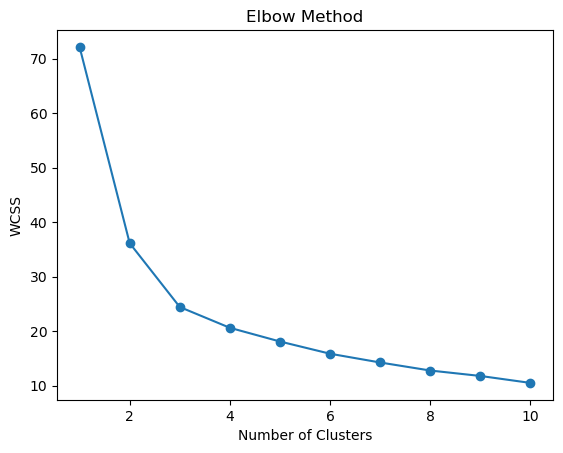

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq

# Define the range of clusters to test
max_clusters = 10
clusters_range = range(1, max_clusters + 1)

# Calculate the within-cluster sum of squares (WCSS) for each number of clusters
wcss = []
for k in clusters_range:
    centroids, distortion = kmeans(coordinates, k)
    wcss.append(distortion)

# Plot the WCSS values against the number of clusters
plt.plot(clusters_range, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


# From this map the total within sum of squares drops with each new cluster at at around k= 3 it becomes an insigficant drop and we can slighlty see the elbow at k3.

In [101]:
import os
os.environ['OMP_NUM_THREADS'] = '3'

In [102]:

from sklearn.cluster import KMeans

# Create a new column 'Cluster' and assign cluster labels using K-means algorithm
df1['Cluster'] = KMeans(n_clusters=3, n_init=10).fit_predict(coordinates)


C:\Users\cool_\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [103]:
import warnings
from sklearn.cluster import KMeans

# Filter and ignore the specific warning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

# Perform K-means clustering
df1['Cluster'] = KMeans(n_clusters=3, n_init=10).fit_predict(coordinates)


In [105]:
df1['Cluster'].value_counts()

0    329
1    138
2     90
Name: Cluster, dtype: int64

In [107]:
!pip install folium

     -------------------------------------- 102.3/102.3 kB 5.8 MB/s eta 0:00:00


In [122]:
import folium
import matplotlib.pyplot as plt

# Create a map centered around the mean latitude and longitude
map_center = df1[['Latitude', 'Longitude']].mean().values.tolist()
m = folium.Map(location=map_center, zoom_start=2)

# Add markers for each data point with different colors for each cluster
for index, row in df1.iterrows():
    folium.CircleMarker(
        location=row[['Latitude', 'Longitude']].values.tolist(),
        radius=4,
        color='blue' if row['Cluster'] == 0 else 'green' if row['Cluster'] == 1 else 'red',
        fill=True,
        fill_color='blue' if row['Cluster'] == 0 else 'green' if row['Cluster'] == 1 else 'red',
        fill_opacity=0.7,
        tooltip=row['Headline']
    ).add_to(m)

# Display the map
m.save('cluster_map.html')
m


In [123]:
import warnings
from sklearn.cluster import KMeans

# Filter and ignore the specific warning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

# Perform K-means clustering
df1['Cluster'] = KMeans(n_clusters=6, n_init=10).fit_predict(coordinates)

In [125]:
import folium
import matplotlib.pyplot as plt

# Create a map centered around the mean latitude and longitude
map_center = df1[['Latitude', 'Longitude']].mean().values.tolist()
m = folium.Map(location=map_center, zoom_start=2)

# Add markers for each data point with different colors for each cluster
color_scheme = ['blue', 'green', 'red', 'purple', 'orange', 'yellow']
for index, row in df1.iterrows():
    folium.CircleMarker(
        location=row[['Latitude', 'Longitude']].values.tolist(),
        radius=4,
        color=color_scheme[row['Cluster']],
        fill=True,
        fill_color=color_scheme[row['Cluster']],
        fill_opacity=0.7,
        tooltip=row['Headline']
    ).add_to(m)

# Display the map
m.save('cluster_map.html')
m
